# Redes Bayesianas

Supongamos una situación en la que tenemos tres variables: **Caries**, **Dolor** y **Huecos**. Por nuestro propio conocimiento, podemos inferir que la caries es la causante del dolor y/o de los huecos en los dientes. Por ese motivo representaremos la red bayesiana con tres nodos, donde el nodo **Caries** es padre de los nodos **Dolor** y **Huecos**. Representaremos en sus respectivas tablas sus valores probabilísticos.

<img src="imgs/red_bayesiana.JPG" width=70%>

Utilizaremos la librería [*pomegranate*](https://pomegranate.readthedocs.io/en/latest/index.html) para crear la red y hacer inferencia sobre ella.

In [29]:
%pylab inline
from pomegranate import *

caries = DiscreteDistribution({'Yes': 0.8, 'No': 0.2})

dolor = ConditionalProbabilityTable(
        [['Yes', 'True', 0.6],
         ['Yes', 'False', 0.4],
         ['No', 'True', 0.1],
         ['No', 'False', 0.9]],
         [caries])

huecos = ConditionalProbabilityTable(
        [['Yes', 'True', 0.9],
         ['Yes', 'False', 0.1],
         ['No', 'True', 0.2],
         ['No', 'False', 0.8]],
         [caries])

s1 = Node(caries, name="caries")
s2 = Node(dolor, name="dolor")
s3 = Node(huecos, name="huecos")

model = BayesianNetwork("Dentista")
model.add_states(s1, s2, s3)
model.add_edge(s1, s2)
model.add_edge(s1, s3)

model.bake()
# model.plot()

Populating the interactive namespace from numpy and matplotlib


Calcularemos ahora qué probabilidad de padecer caries tenemos si nos duele una muela.

In [30]:

# observations = { }
# observations = { 'caries' : 'Yes'}
observations = { 'dolor' : 'True', 'huecos': 'True'}

beliefs = model.predict_proba(observations)

for state, belief in zip( model.states, beliefs ):
    if type(belief) is not str:
        print(state.name)
        print("Estado", belief.parameters)

caries
Estado [{'Yes': 0.9908256880733944, 'No': 0.00917431192660559}]


#### Ejercicio 1

Calcula a mano y mediante la librería los siguientes casos:

- Probabilidad de padecer caries tenemos si tenemos huecos.
- Probabilidad de padecer caries.
- Probabilidad de no padecer caries tenemos si tenemos huecos y dolor.
- Probabilidad de tener huecos.

Verifica que lo que calculas a mano coincide con las respuestas de la librería.

#### Ejercicio 2

Implementa mediante la librería la siguiente red:

<img src="imgs/red_bayesiana_ejemplo_2.JPG" width=70%>

Calcula los valores de las diferentes variables si se produce un robo.

In [79]:
%pylab inline
from pomegranate import *

robo = DiscreteDistribution({'Yes_robo': 0.001, 'No_robo': 0.999})
terremoto = DiscreteDistribution({'Yes_terremoto': 0.002, 'No_terremoto': 0.998})

alarma = ConditionalProbabilityTable(
        [['Yes_robo', 'Yes_terremoto', 'Salta_alarma', 0.95],
         ['Yes_robo', 'Yes_terremoto', 'No_salta_alarma', 0.05],
         ['Yes_robo', 'No_terremoto', 'Salta_alarma', 0.94],
         ['Yes_robo', 'No_terremoto', 'No_salta_alarma', 0.06],
         ['No_robo', 'Yes_terremoto', 'Salta_alarma', 0.29],
         ['No_robo', 'Yes_terremoto', 'No_salta_alarma', 0.71],
         ['No_robo', 'No_terremoto', 'Salta_alarma', 0.001],
         ['No_robo', 'No_terremoto', 'No_salta_alarma', 0.999]],
         [robo, terremoto])

juan = ConditionalProbabilityTable(
        [['Salta_alarma','Juan_llama', 0.90],
         ['Salta_alarma','Juan_no_llama', 0.10],
         ['No_salta_alarma','Juan_llama', 0.05],
         ['No_salta_alarma','Juan_no_llama', 0.95]],
         [alarma])

maria = ConditionalProbabilityTable(
        [['Salta_alarma','Maria_llama', 0.70],
         ['Salta_alarma','Maria_no_llama', 0.30],
         ['No_salta_alarma','Maria_llama', 0.01],
         ['No_salta_alarma','Maria_no_llama', 0.99]],
         [alarma])

s1 = Node(robo, name="Robo")
s2 = Node(terremoto, name="Terremoto")
s3 = Node(alarma, name="Alarma")
s4 = Node(juan, name="Juan")
s5 = Node(maria, name="Maria")


model = BayesianNetwork("Avisos")
model.add_states(s1, s2, s3, s4, s5)
model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.add_edge(s3, s4)
model.add_edge(s3, s5)

model.bake()
#model.plot()

Populating the interactive namespace from numpy and matplotlib


In [88]:
# observations = {}
observations = {'Robo':'Yes_robo', 'Juan':'Juan_llama'}
# observations = {'Robo':'Yes_robo', 'Juan':'Juan_llama', 'Terremoto':'Yes_terremoto','Maria':'Maria_llama'}
# observations = {'Juan':'Juan_llama', 'Maria':'Maria_llama'}
# observations = {'Alarma' : 'Salta_alarma', 'Juan':'Juan_llama', 'Maria':'Maria_llama'}
# observations = {'Alarma' : 'Salta_alarma', 'Juan':'Juan_llama'}

beliefs = model.predict_proba(observations)

for state, belief in zip( model.states, beliefs ):
    if type(belief) is not str:
        print(state.name)
        print("Estado", belief.parameters)

Terremoto
Estado [{'Yes_terremoto': 0.0020199831098792823, 'No_terremoto': 0.9979800168901206}]
Alarma
Estado [{'No_salta_alarma': 0.003532320318674678, 'Salta_alarma': 0.9964676796813253}]
Maria
Estado [{'Maria_llama': 0.6975626989801145, 'Maria_no_llama': 0.30243730101988553}]


## Redes bayesianas a partir de datos

En un caso normal no contaremos con el DAG (directed acyclid graph) ni con las CPT (conditional probabilisty tables). Tendremos que construir todo eso a partir de los datos que podamos recoger.

El siguiente *script* nos generará un *dataframe* con 100.000 muestras con el que reconstruiremos el ejemplo anterior.

In [81]:
import numpy as np
import pandas as pd

np.random.seed(666)

earthquake = np.random.choice(2, 100000, p=[0.998, 0.002])
robbery = np.random.choice(2, 100000, p=[0.999, 0.001])

alarm = []

for e,r in zip(earthquake, robbery):
    if e==0 and r==0:
        a = np.random.choice(2, p=[0.999, 0.001])
    if e==0 and r==1:
        a = np.random.choice(2, p=[0.06, 0.94])
    if e==1 and r==0:
        a = np.random.choice(2, p=[0.71, 0.29])
    if e==1 and r==1:
        a = np.random.choice(2, p=[0.05, 0.95])
    alarm.append(a)
        
juan = []
maria = []
        
for a in alarm:
    if a==0:
        j = np.random.choice(2, p=[0.95, 0.05])
        m = np.random.choice(2, p=[0.99, 0.01])
    if a==1:
        j = np.random.choice(2, p=[0.10, 0.90])
        m = np.random.choice(2, p=[0.30, 0.70])
    juan.append(j)
    maria.append(m)

aux = np.stack((np.array(earthquake), np.array(robbery), np.array(alarm), np.array(juan), np.array(maria)), axis=0)
samples = np.transpose(aux)

#df = pd.DataFrame(data=samples, columns=["Earthquake", "Robbery", "Alarm", "Juan", "María"])
df = pd.DataFrame(data=samples, columns=["E", "R", "A", "J", "M"])

df

,E,R,A,J,M
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
99995,0,0,0,0,0
99996,0,0,0,0,0
99997,0,0,0,0,0
99998,0,0,0,0,0


Fíjate que si no contáramos con suficientes datos las probabilidades que calculáramos podrían no ser muy precisas.

In [109]:
print("Porcentaje de veces que hay un robo:", np.round( sum(df['R'])/df.shape[0],4) )

Porcentaje de veces que hay un robo: 0.001


In [110]:
print("Porcentaje de veces que hay un terremoto:", np.round( sum(df['E'])/df.shape[0],4) )

Porcentaje de veces que hay un terremoto: 0.002


In [111]:
print("Porcentaje de veces que suena la alarma y Juan llama:", np.round( sum(df['A'] * df['J']) / sum(df['A']),2) )

Porcentaje de veces que suena la alarma y Juan llama: 0.91


In [112]:
print("Porcentaje de veces que suena la alarma y María llama:", np.round( sum(df['A'] * df['M']) / sum(df['A']),2) )

Porcentaje de veces que suena la alarma y María llama: 0.7


### Creación del DAG

Una vez obtenido el *dataset*, el siguiente paso será crear el DAG. Utilizaremos la librería [bnlearn](https://erdogant.github.io/bnlearn/pages/html/index.html). Para ello haremos:

In [83]:
import bnlearn as bn

DAG = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')

[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]


In [84]:
# print adjacency matrix
print(DAG['adjmat'])

target      A      E      J      M      R
source                                   
A       False  False   True   True  False
E        True  False  False  False  False
J       False  False  False  False  False
M       False  False  False  False  False
R        True  False  False  False  False


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


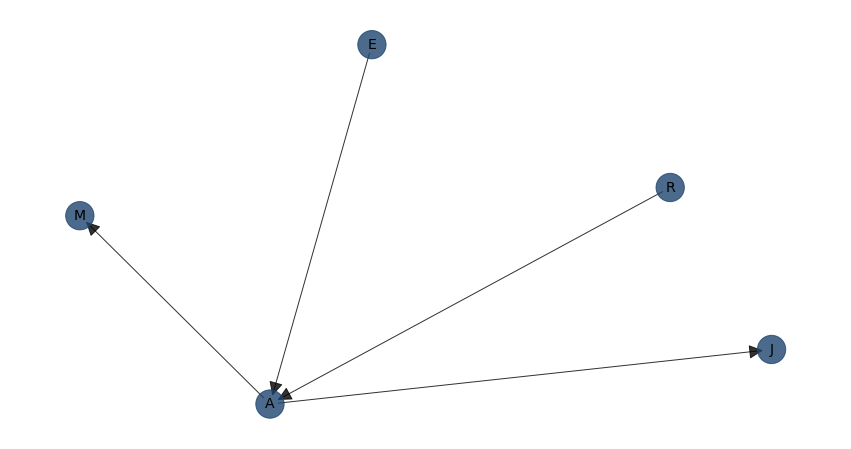

{'pos': {'A': array([-0.43358995, -0.83724467]),
  'E': array([-0.16194989,  1.        ]),
  'J': array([ 0.90291224, -0.55822437]),
  'M': array([-0.94019281,  0.12562049]),
  'R': array([0.6328204 , 0.26984856])},
 'G': <networkx.classes.digraph.DiGraph at 0x10d67bf98>,
 'node_properties': {'A': {'node_color': '#1f456e', 'node_size': 800},
  'E': {'node_color': '#1f456e', 'node_size': 800},
  'J': {'node_color': '#1f456e', 'node_size': 800},
  'M': {'node_color': '#1f456e', 'node_size': 800},
  'R': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('A', 'J'): {'color': '#000000', 'weight': 1},
  ('A', 'M'): {'color': '#000000', 'weight': 1},
  ('E', 'A'): {'color': '#000000', 'weight': 1},
  ('R', 'A'): {'color': '#000000', 'weight': 1}}}

In [85]:
# bn.plot(DAG, interactive=True, params_interactive={'notebook':True})
bn.plot(DAG)

### Aprendizaje de los parámetros

A partir del grafo y de los datos es posible crear las tablas de probabilidad condicionada.

In [86]:
model = bn.parameter_learning.fit(DAG, df, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of A:
+------+-----------------------+--------+--------------------+------+
| E    | E(0)                  | E(0)   | E(1)               | E(1) |
+------+-----------------------+--------+--------------------+------+
| R    | R(0)                  | R(1)   | R(0)               | R(1) |
+------+-----------------------+--------+--------------------+------+
| A(0) | 0.999027159305171     | 0.0625 | 0.7076923076923077 | 0.0  |
+------+-----------------------+--------+--------------------+------+
| A(1) | 0.0009728406948289004 | 0.9375 | 0.2923076923076923 | 1.0  |
+------+-----------------------+--------+--------------------+------+
[bnlearn] >CPD of J:
+------+----------------------+---------------------+
| A    | A(0)                 | A(1)                |
+------+----------------------+---------------------+
| J(0) | 0.9506190165906471   | 0.0897

### Inferencia

In [107]:
# q1 = bn.inference.fit(model, variables=['A','M'], evidence={'R':1, 'J':1})
q1 = bn.inference.fit(model, variables=['A'], evidence={'R':0, 'E':1})
print(q1.df)

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+-----+----------+
|    |   A |        p |
+====+=====+==========+
|  0 |   0 | 0.707692 |
+----+-----+----------+
|  1 |   1 | 0.292308 |
+----+-----+----------+
   A         p
0  0  0.707692
1  1  0.292308


In [108]:
q2 = bn.inference.fit(model, variables=['A'], evidence={'R':1, 'J':1})
print(q2.df)

[bnlearn] >Variable Elimination..


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+----+-----+-----------+
|    |   A |         p |
+====+=====+===========+
|  0 |   0 | 0.0035963 |
+----+-----+-----------+
|  1 |   1 | 0.996404  |
+----+-----+-----------+
   A         p
0  0  0.003596
1  1  0.996404


In [281]:
0.695449+0.300955 

0.996404

### Almacenamiento y carga del modelo

In [299]:
# Save model
bn.save(model, filepath='bnlearn_model', overwrite=True)

# Load model
model = bn.load(filepath='bnlearn_model')

[pypickle] Pickle file saved: [/Users/cayetanoguerraartal/Propio/Docencia/cayetanoguerra.github.io/ia/nbpy/bnlearn_model.pkl]
[pypickle] Pickle file loaded: [/Users/cayetanoguerraartal/Propio/Docencia/cayetanoguerra.github.io/ia/nbpy/bnlearn_model.pkl]


### Ejercicios

1) Calcula las CPTs de las variables *Earthquake* y *Alarm* y comprueba que obtienes los mismos valores que los dados por la librería <code>bn.parameter_learning.fit</code>.

In [106]:
print(np.round( sum((1-df['R']))/df.shape[0],7) )

0.99903


2) Utilizando el dataset "asia" realiza las siguientes tareas:
- Crear su correspondiente DAG. Prueba otros valores para el parámetro <code>methodtype</code>, como **hc**.
- Calcular las CPT
- Hacer las inferencias:
    - ¿Qué probabilidad hay de tener disnea siendo fumador?
    - ¿Qué probabilidad hay de tener una radiografía positiva siendo fumador habiendo visitado Asia?

<img src="imgs/ASIA_BN.jpeg" width=40%/>

In [116]:
import bnlearn as bn
df_asia = bn.import_example('asia', n=10000)
print(df_asia)

[bnlearn] >Extracting files..


  0%|          | 0/8 [00:00<?, ?it/s]

      asia  tub  smoke  lung  bronc  either  xray  dysp
0        1    1      0     1      0       1     1     0
1        1    1      0     1      0       1     1     1
2        1    1      0     1      1       1     1     1
3        1    1      1     1      0       1     1     0
4        1    1      0     0      0       0     0     0
...    ...  ...    ...   ...    ...     ...   ...   ...
9995     1    1      1     1      1       1     1     1
9996     1    1      1     1      1       1     1     1
9997     1    1      1     1      1       1     0     1
9998     1    1      0     1      1       1     1     1
9999     1    0      0     1      1       0     0     0

[10000 rows x 8 columns]


In [123]:
DAG_asia = bn.structure_learning.fit(df_asia, methodtype='hc', scoretype='bic')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


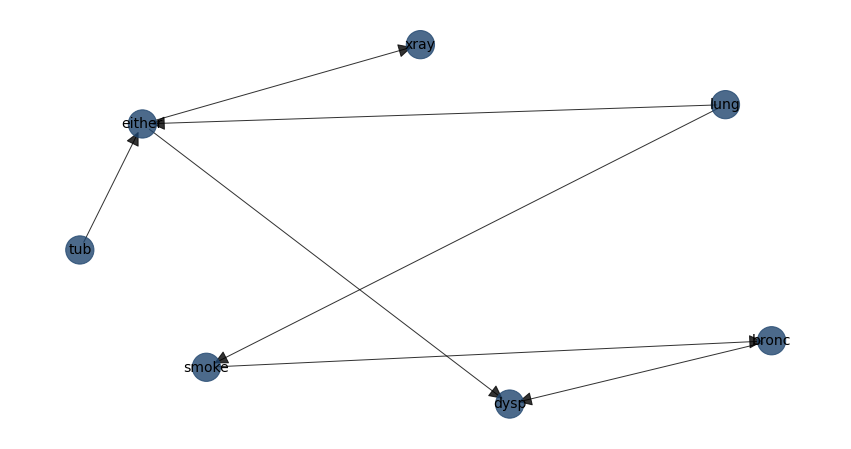

target   asia    tub  smoke   lung  bronc  either   xray   dysp
source                                                         
asia    False  False  False  False  False   False  False  False
tub     False  False  False  False  False    True  False  False
smoke   False  False  False  False   True   False  False  False
lung    False  False   True  False  False    True  False  False
bronc   False  False  False  False  False   False  False   True
either  False  False  False  False  False   False   True   True
xray    False  False  False  False  False   False  False  False
dysp    False  False  False  False  False   False  False  False


In [124]:
bn.plot(DAG_asia)
print(DAG_asia['adjmat'])

## Aprendizaje de la estructura

Todos los métodos que intentan buscar la mejor estructura del grafo tienen un coste totalmente exponencial. Existen dos tipos de familias de métodos: los métodos basados en puntuación (*score-based*) y los métodos basados en restricciones (*constraint-based*).

### Métodos basados en puntuación

Métodos basados en la maximización de la verosimilitud de los datos. En otras palabras esto quiere decir que se busca la estructura del grafo que mejor se adapte o explique los datos. Para ello es necesario disponer de una función con la que optimizar. Una de esas funciones puede ser:

$$
\text{Score}(G,D) = P(G|D)
$$

Esto quiere decir, ¿qué probabilidad hay de que, dados unos datos $D$, $G$ sea el grafo que mejor los "explica"? Los métodos basados en puntuación intentan maximizar este índice. Podríamos cambiar esta expresión a otra algo más conveniente:

$$
\text{Score}(G,D) = P(G|D) = \frac{P(D|G) \cdot P(G)}{P(D)}
$$

$P(D|G)$ nos dice cuál es la probabilidad de obtener ciertos datos $D$ dado un grafo $G$. No tenemos que preocuparnos de $P(G)$, podemos asumir que todos los grafos tienen la misma probabilidad. En cuanto a $P(D)$ es la misma para todos los grafos. Por lo tanto, una función de *score* válida sería:

$$
\text{Score}(G,D) = \prod_{d \in D} P(d|G)
$$

Un problema que surge en estos métodos es que los grafos totalmente conectados tendrán un *score* mayor. Es necesario añadir a la expresión anterior un factor de regularización que penalice nuevos arcos entre nodos. 



$$
\text{Score}(G,D) = \prod_{d \in D} P(d|G) - \phi(\lvert D \rvert) \lVert G \rVert
$$

$\lvert D \rvert$ corresponde al número de muestras, y $|G|$ es el número de parámetros en el grafo. Por tanto, a medida que $|G|$ crece penaliza la función a maximizar. Como la función también cambia con el número de muestras, el factor de regularización es afectado por esta cantidad.

Los enfoques basados en puntuación tienen dos componentes principales:

- El **algoritmo de búsqueda** para optimizar todo el espacio de búsqueda de todos los DAG posibles, como ExhaustiveSearch, Hillclimbsearch y Chow-Liu.


- La **función de *score*** indica qué tan bien se ajusta la red bayesiana a los datos. Las funciones de puntuación más comúnmente utilizadas son el criterio de información bayesiano (BIC), Dirichlet o K2.



### Métodos basados en restricciones

Mediante el aprendizaje basado en restricciones es posible construir un DAG mediante la identificación de independencias en el conjunto de datos haciendo uso de pruebas de hipótesis. Este enfoque se basa en pruebas estadísticas e hipótesis condicionales para detectar la independencia entre las variables del modelo. Un ejemplo de un enfoque basado en restricciones es el algoritmo llamadao PC que comienza con un grafo completamente conectado y va eliminando los arcos según los resultados de las pruebas si los nodos son independientes hasta que se logra un criterio de parada.

## Referencias

https://towardsdatascience.com/a-step-by-step-guide-in-detecting-causal-relationships-using-bayesian-structure-learning-in-python-c20c6b31cee5